<a href="https://colab.research.google.com/github/Anu589/Bank-Marketing-Data/blob/main/Telephone_Churn_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>Churn Prediction with Machine Learning</h1>
<center> Anushka Chakraborty
<center> MSc Data Science
<center> Chennai Mathematical Institute

## <h2>1. Introduction</h2>
Churn prediction helps businesses identify customers likely to leave. This project leverages **machine learning models** to predict customer churn based on various attributes.

This is a kaggle dataset: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

## Key Steps:
- **Data Loading and Preprocessing**: Load the dataset, handle missing values, and drop irrelevant columns.
- **Exploratory Data Analysis (EDA)**: Visualize data distributions, class imbalance, and churn rates by state.
- **Feature Engineering**: Create new features and encode categorical variables.
- **Model Training**: Train multiple machine learning models (Random Forest, LightGBM, XGBoost, CatBoost).
- **Hyperparameter Tuning**: Use GridSearchCV to optimize model hyperparameters.
- **Model Evaluation**: Evaluate models using accuracy, ROC-AUC, precision-recall curves, and confusion matrices.
- **Model Interpretation**: Use SHAP values to explain model predictions and visualize feature importance.

## <h2>2. Libraries Used</h2>

We use several libraries for **data handling, visualization, modeling, and evaluation**.

### <h3>2.1 Data Processing & Preprocessing</h3>
- **pandas** - Data handling, reading CSV files.
- **numpy** - Numerical computations.
- **sklearn.preprocessing** - Label encoding, standardization.
- **imblearn** - SMOTE for handling class imbalance.

### <h3>2.2 Data Visualization</h3>
- **matplotlib** - Basic plotting.
- **seaborn** - Advanced statistical visualizations.
- **plotly** - Interactive visualizations.
- **geopandas & us** - Mapping churn data by state.

### <h3>2.3 Machine Learning Models</h3>
- **scikit-learn (sklearn)**  
  - `LogisticRegression` - Baseline classifier.
  - `RandomForestClassifier` - Ensemble model.
  - `GradientBoostingClassifier` - Boosted tree model.
  - `AdaBoostClassifier` - Another boosting model.
  - `StackingClassifier` - Combining models.

- **XGBoost (`xgboost`)** - Powerful gradient boosting model.
- **LightGBM (`lightgbm`)** - Efficient boosting model.
- **CatBoost (`catboost`)** - Boosting model optimized for categorical features.

### <h3>2.4 Model Evaluation & Feature Importance</h3>
- **sklearn.metrics** - Accuracy, confusion matrix, ROC-AUC, precision-recall.
- **shap** - Explainability (SHAP values).
- **GridSearchCV / RandomizedSearchCV** - Hyperparameter tuning.


In [ ]:
pip install geopandas plotly

In [ ]:
pip install catboost

In [ ]:
pip install plotly pandas geopandas us

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import us
import warnings

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import (
    StratifiedKFold,
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # For SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    auc,
    accuracy_score
)


## <h2>3. Data Preprocessing and Visualization</h2>

### <h3>3.1 Data Loading</h3>


In [ ]:
url = "churn-bigml-20.csv"

Loads a CSV file from a given URL, removes missing values, and drops specific columns if they exist.

- Parameters:
  - url (str): The URL of the CSV file.

- Returns:
  - pd.DataFrame: A cleaned DataFrame.

- Exceptions:
  - Prints an error message if reading the file fails.

In [ ]:
try:
    df = pd.read_csv(url, sep=",")
    df.dropna(inplace=True)

    # Drop columns if they exist
    for col in ['Area code', 'Number vmail messages']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)
except Exception as e:
    print(f"Error loading data: {e}")


In [ ]:
df.describe()

Account length  Total day minutes  Total day calls  Total day charge  \
count      667.000000         667.000000       667.000000        667.000000   
mean       102.841079         180.948126       100.937031         30.761769   
std         40.819480          55.508628        20.396790          9.436463   
min          1.000000          25.900000        30.000000          4.400000   
25%         76.000000         146.250000        87.500000         24.860000   
50%        102.000000         178.300000       101.000000         30.310000   
75%        128.000000         220.700000       115.000000         37.520000   
max        232.000000         334.300000       165.000000         56.830000   

       Total eve minutes  Total eve calls  Total eve charge  \
count         667.000000       667.000000        667.000000   
mean          203.355322       100.476762         17.285262   
std            49.719268        18.948262          4.226160   
min            48.100000        37.000000          4.090000   
25%           171.050000        88.000000         14.540000   
50%           203.700000       101.000000         17.310000   
75%           236.450000       113.000000         20.095000   
max           361.800000       168.000000         30.750000   

       Total night minutes  Total night calls  Total night charge  \
count           667.000000         667.000000          667.000000   
mean            199.685307         100.113943            8.985907   
std              49.759931          20.172505            2.239429   
min              23.200000          42.000000            1.040000   
25%             167.950000          86.000000            7.560000   
50%             201.600000         100.000000            9.070000   
75%             231.500000         113.500000           10.420000   
max             367.700000         175.000000           16.550000   

       Total intl minutes  Total intl calls  Total intl charge  \
count          667.000000        667.000000         667.000000   
mean            10.238381          4.527736           2.764948   
std              2.807850          2.482442           0.758167   
min              0.000000          0.000000           0.000000   
25%              8.600000          3.000000           2.320000   
50%             10.500000          4.000000           2.840000   
75%             12.050000          6.000000           3.255000   
max             18.300000         18.000000           4.940000   

       Customer service calls  
count              667.000000  
mean                 1.563718  
std                  1.333357  
min                  0.000000  
25%                  1.000000  
50%                  1.000000  
75%                  2.000000  
max                  8.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   International plan      667 non-null    object 
 3   Voice mail plan         667 non-null    object 
 4   Total day minutes       667 non-null    float64
 5   Total day calls         667 non-null    int64  
 6   Total day charge        667 non-null    float64
 7   Total eve minutes       667 non-null    float64
 8   Total eve calls         667 non-null    int64  
 9   Total eve charge        667 non-null    float64
 10  Total night minutes     667 non-null    float64
 11  Total night calls       667 non-null    int64  
 12  Total night charge      667 non-null    float64
 13  Total intl minutes      667 non-null    float64
 14  Total intl calls        667 non-null    in

### <h3>3.2 Exploratory Data Analysis (EDA)</h3>

<h4> 3.2.1 Boxplot of Total Day Minutes by Churn <h4>

<ipython-input-401-375478889038>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




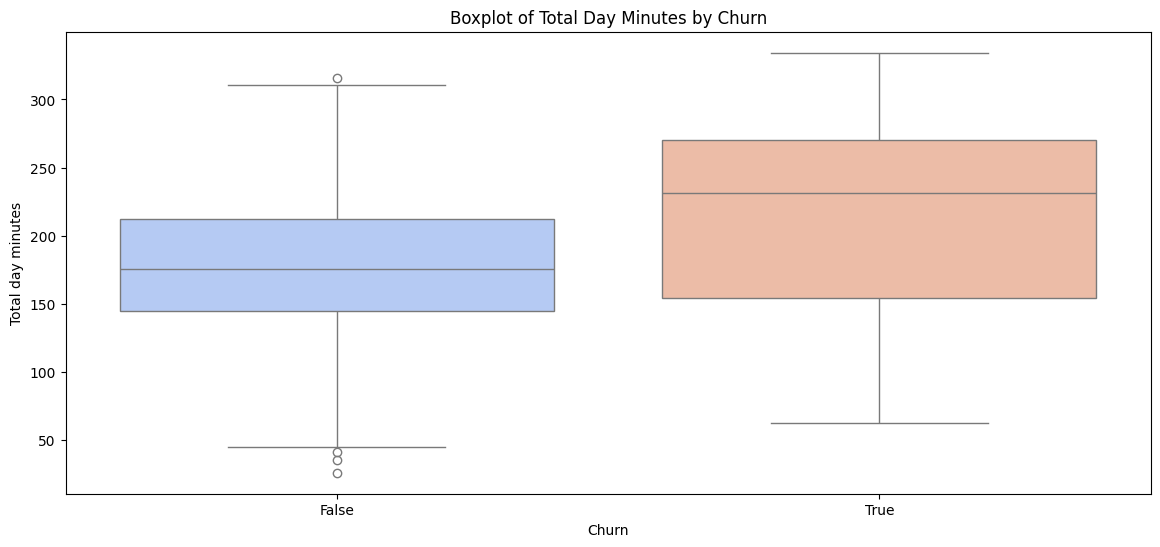

In [ ]:
plt.figure(figsize=(14, 6)) #initialize a figure
sns.boxplot(data=df, x="Churn", y="Total day minutes", palette="coolwarm")  #add boxplot
plt.title("Boxplot of Total Day Minutes by Churn")  #add title
plt.show()  #show the plot

In [ ]:
print(df["Churn"].value_counts(normalize=True))  # Check class imbalance

Churn
False    0.857571
True     0.142429
Name: proportion, dtype: float64


<h4> 3.2.2 Feature Distributions <h4>

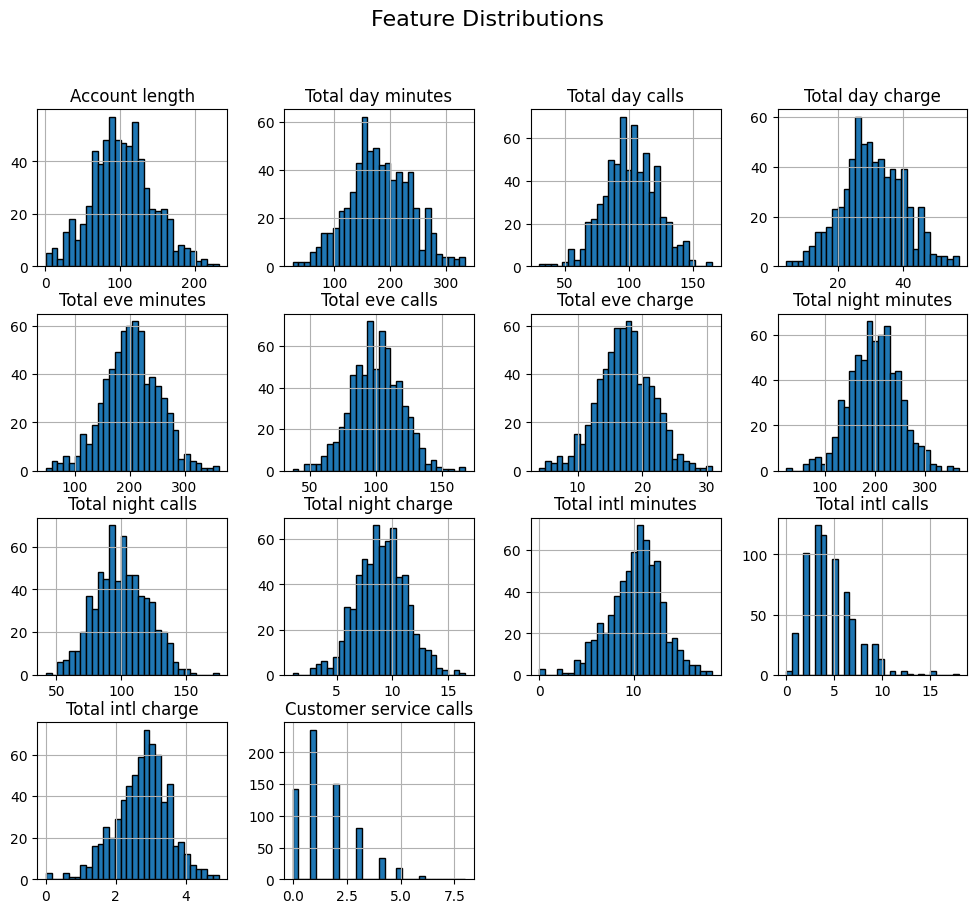

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black') #create histogram with figure size 12*10, divide the data into 30 bins
plt.suptitle("Feature Distributions", fontsize=16)  #add title
plt.show()  #plot

<h4> 3.2.3 SNS Pairplot of the given Dataset <h4>

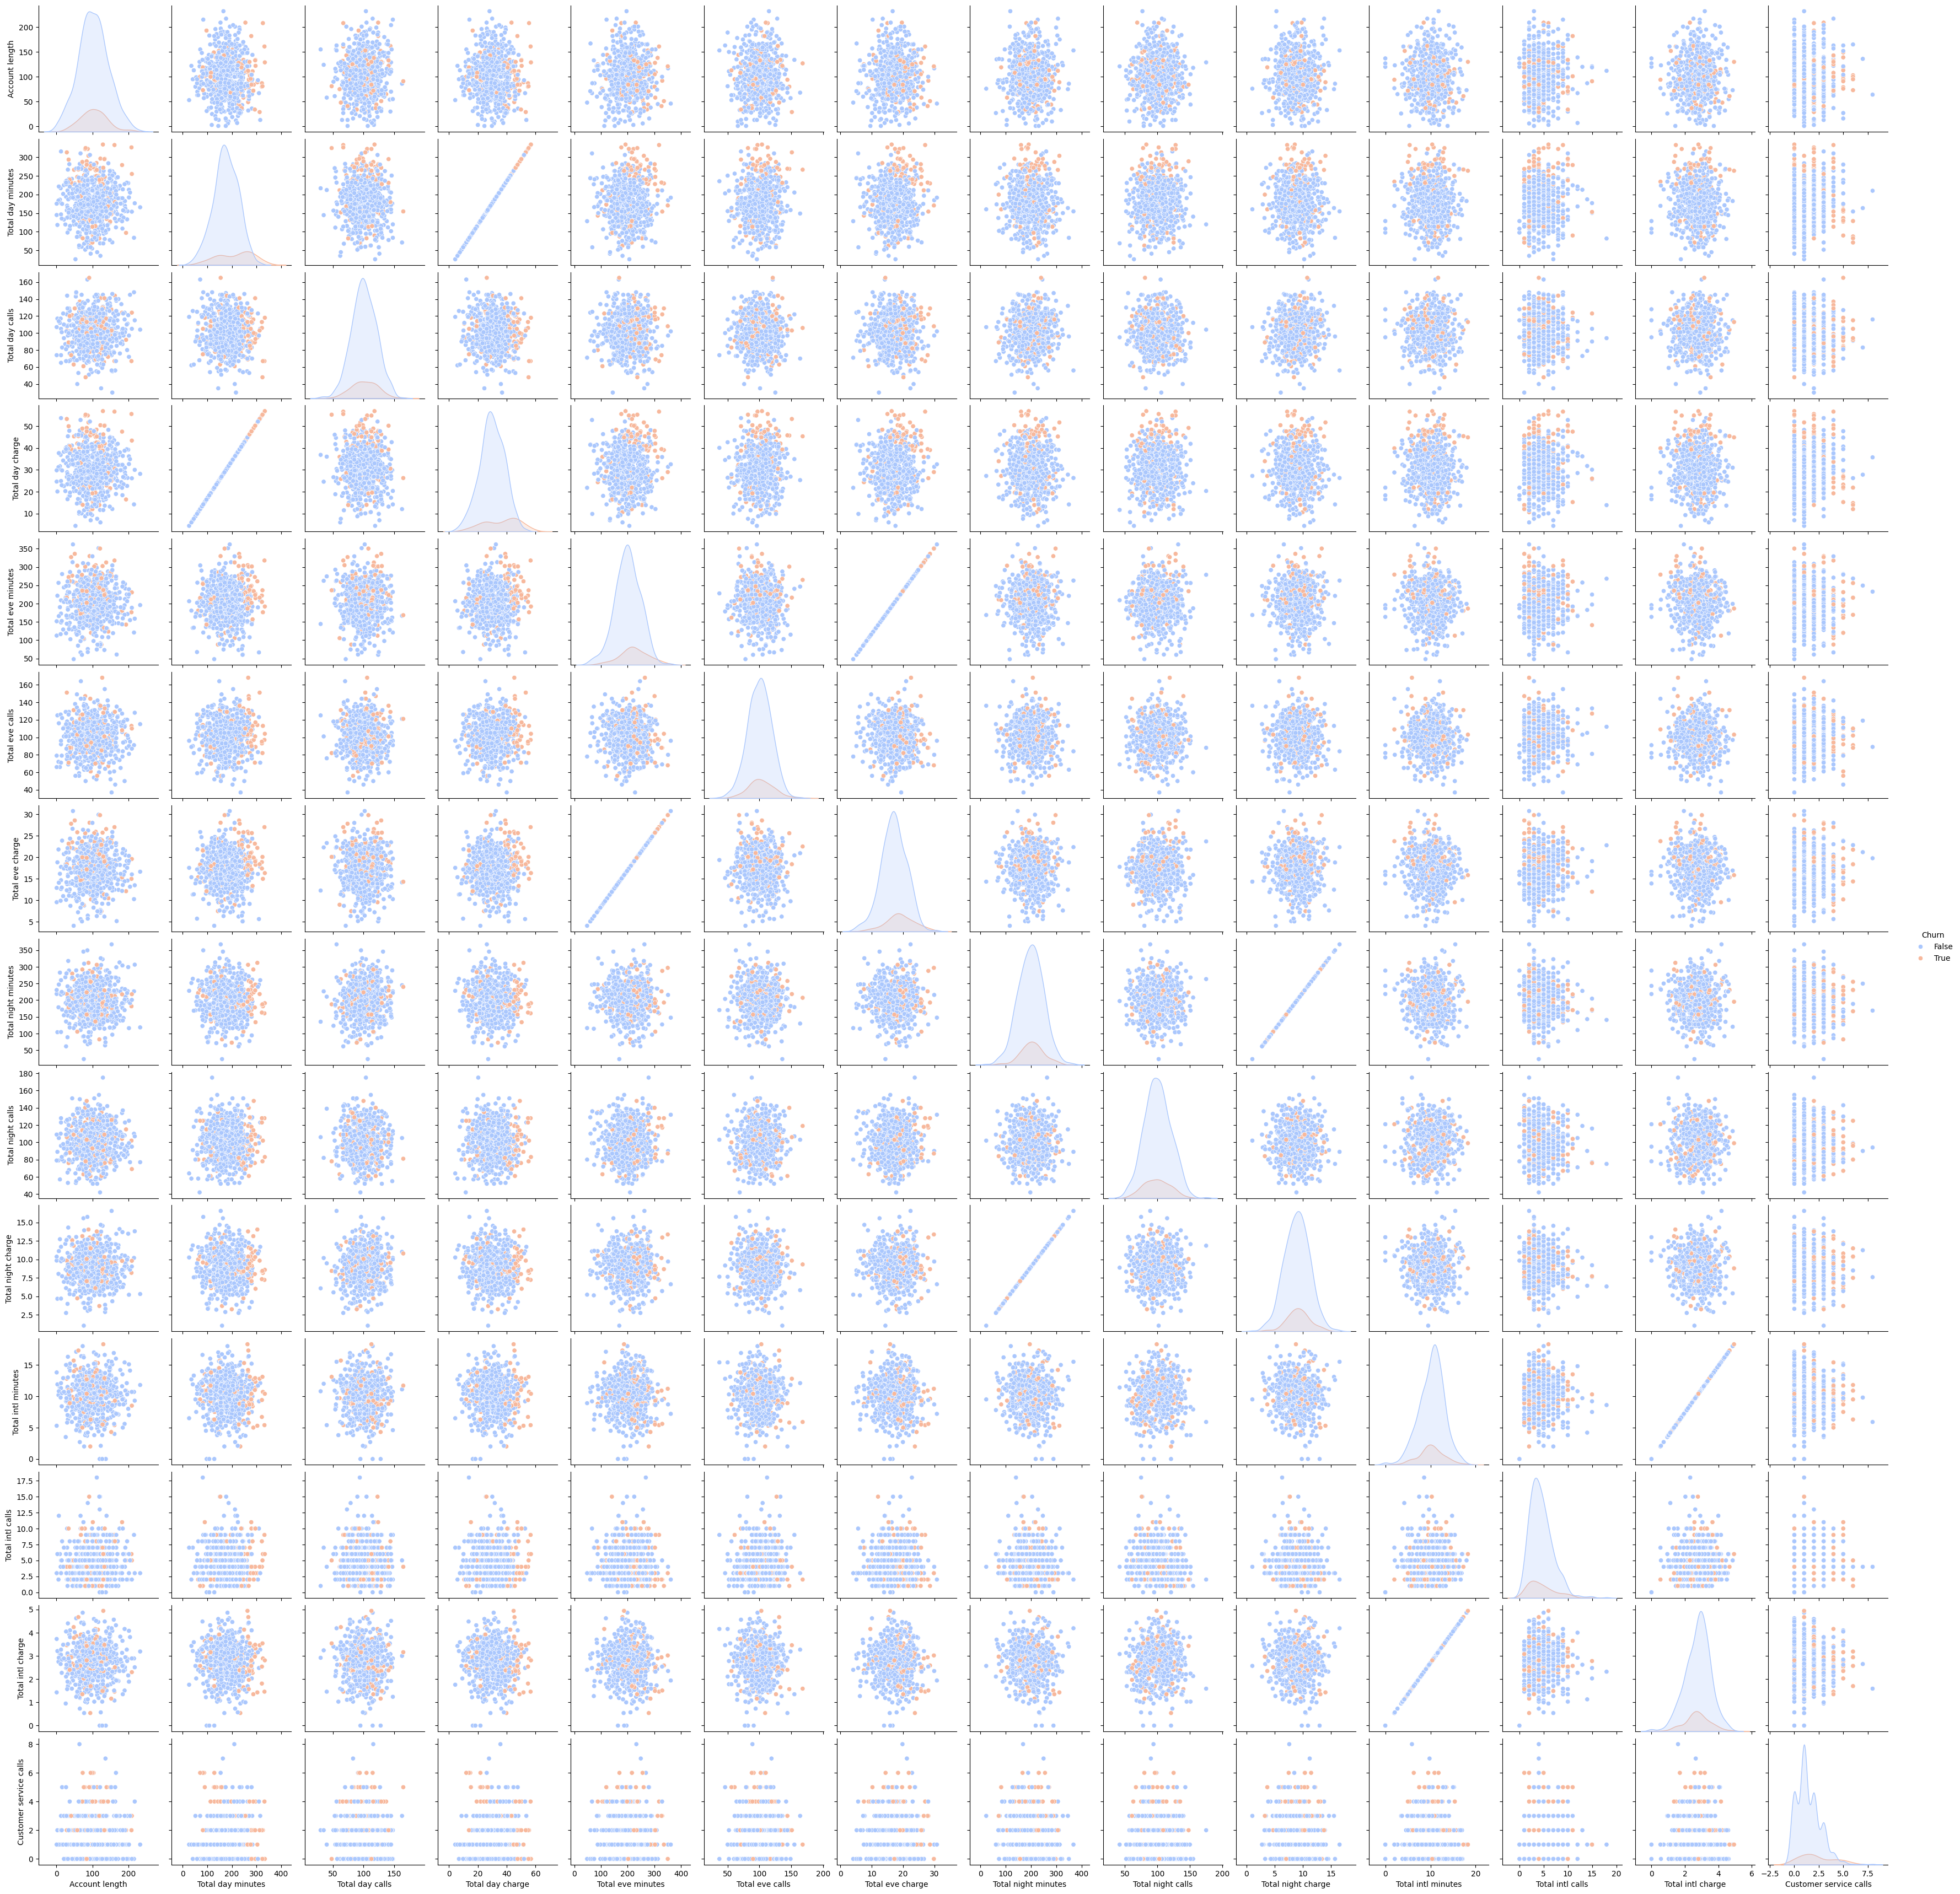

In [ ]:
sns.pairplot(df, hue="Churn", diag_kind="kde", palette="coolwarm")  #create a pairplot using seaborn
plt.show()  #display the pairplot

<h4> 3.2.4 Churn Rate by State <h4>

In [ ]:
df_state_churn = df.groupby("State")["Churn"].mean().reset_index() # Compute Churn Rate per State

In [ ]:
df_state_churn

In [ ]:
def get_state_abbr(state_name):
    state = us.states.lookup(state_name)
    return state.abbr if state else None

In [ ]:
df_state_churn["State Code"] = df_state_churn["State"].apply(get_state_abbr)

In [ ]:
#Create a Choropleth Map
fig = px.choropleth(
    df_state_churn,
    locations="State Code",
    locationmode="USA-states",
    color="Churn",
    scope="usa",
    color_continuous_scale="Purples",
    title="Churn Rate by State"
)
fig.show()


<h3>3.3 Encoding Categorical Variables</h3>

In [ ]:
label_encoders = {}
for col in ['International plan', 'Voice mail plan', 'State']:
    le = LabelEncoder() #Apply Label Encoding to Non-Numeric Columns
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

- Converts categorical variables into numerical format.

<h3>3.4 Define features and target</h3>

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

- Removes the churn clumn from dataframe and stores in X
- y Contains only the churn column which is the target variable

<h3>3.5 Feature Engineering</h3>

In [ ]:
X['Day Call Ratio'] = X['Total day calls'] / (X['Total day minutes'] + 1)
X['Intl Charge Ratio'] = X['Total intl charge'] / (X['Total intl minutes'] + 1)

- Day Call Ratio - Ratio of calls to minutes.
- Intl Charge Ratio - Ratio of international charge to minutes.

<h3>3.6 Splitting Data</h3>

In [ ]:
# Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Splits dataset into training (80%) and test (20%).

In [ ]:
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

- Extracts numerical column names from a DataFrame.

<h3>3.7 Standardization</h3>

In [ ]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

- Standardizes numeric features to improve model performance.

<h3>3.8 Handling Class Imbalance with SMOTE</h3>

In [ ]:
X_resampled, y_resampled = SMOTE(sampling_strategy=0.5, random_state=42).fit_resample(X_train, y_train)

- SMOTE (Synthetic Minority Over-sampling Technique) to balance an imbalanced dataset by generating synthetic samples for the minority class [an imbalance was observed in the churn class].

In [ ]:
X_resampled

State  Account length  International plan  Voice mail plan  \
0    0.380730        1.837756           -0.296235         1.659374   
1   -1.196616        0.069707           -0.296235         1.659374   
2   -0.785135        0.020594           -0.296235        -0.602637   
3    1.272273        0.438050           -0.296235        -0.602637   
4    0.312150        0.585388           -0.296235        -0.602637   
..        ...             ...                 ...              ...   
680 -0.453838        0.724414           -0.296235        -0.602637   
681  0.558571        0.878397           -0.296235        -0.602637   
682  0.351873       -0.473045           -0.296235        -0.602637   
683  1.584525        0.873299           -0.296235        -0.602637   
684 -0.176676       -0.416452           -0.296235        -0.602637   

     Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0            -0.104002        -0.629192         -0.103852          -0.254049   
1            -0.273625         1.187956         -0.274002           0.279870   
2             1.770782         1.235775          1.770944          -0.467616   
3            -0.841417         0.518480         -0.841167          -0.151294   
4             1.045866         0.279382          1.046233          -1.485085   
..                 ...              ...               ...                ...   
680          -0.696291         0.352803         -0.696112           0.302808   
681          -0.266029        -1.053893         -0.265689           0.238380   
682           2.520899         0.379917          2.521102           0.195484   
683           2.084090        -0.469473          2.084078           0.414889   
684           1.647852        -1.247051          1.647909           1.863917   

     Total eve calls  Total eve charge  Total night minutes  \
0          -1.902520         -0.254072            -1.194073   
1          -0.420542          0.279256            -0.512699   
2          -1.161531         -0.467403            -0.958365   
3           0.161663         -0.152147            -0.780099   
4           1.061435         -1.484283             1.008508   
..               ...               ...                  ...   
680         0.162802          0.302668            -0.423028   
681         0.058500          0.239323            -0.935503   
682        -0.373627          0.195330            -0.458642   
683         0.836207          0.414048             0.864779   
684         0.220173          1.864546            -0.146980   

     Total night calls  Total night charge  Total intl minutes  \
0            -0.276436           -1.194679            0.086097   
1            -0.678318           -0.512485            1.349113   
2            -1.130436           -0.957011            1.735035   
3             1.984154           -0.780961            0.086097   
4             0.527330            1.010347            0.366767   
..                 ...                 ...                 ...   
680           0.739556           -0.424202           -0.174818   
681           0.323833           -0.934856           -0.014993   
682           1.320244           -0.457628           -0.719650   
683          -0.062665            0.866397            0.681766   
684          -0.831019           -0.147804           -0.104775   

     Total intl calls  Total intl charge  Customer service calls  \
0           -0.633742           0.091811                0.296605   
1            1.381678           1.352223                1.795091   
2            0.575510           1.729047                2.544334   
3           -1.036826           0.091811                0.296605   
4            0.172426           0.364684               -0.452638   
..                ...                ...                     ...   
680         -0.909080          -0.177503                2.544334   
681          0.370551          -0.009499                1.922082   
682          0.483928          -0.718407    

<h3>3.9 Studying correlation between features<h3>

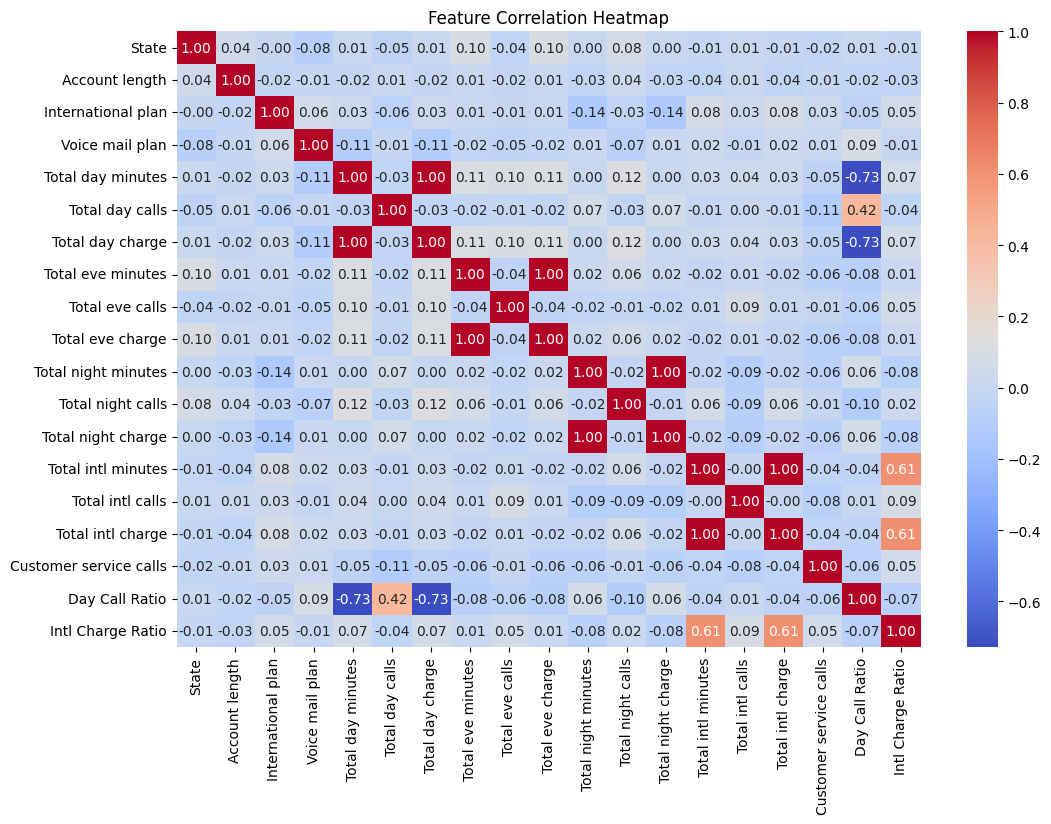

In [ ]:
plt.figure(figsize=(12, 8)) #initialize the figure
corr=X_resampled.corr() #calculate the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f") #create heatmap with seaborn
plt.title("Feature Correlation Heatmap")  #title
plt.show()  #plot

<h2>4. Model Training & Hyperparameter Tuning</h2>

<h3>4.1 Hyperparameter Tuning</h3>

In [ ]:
# Define hyperparameter grids
#for random forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}
#for LGBM
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50]
}
#for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10]
}
#for CatBoost
param_grid_cat = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 10]
}

# Initialize models
rf = RandomForestClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
cat = CatBoostClassifier(verbose=0, random_state=42)

# Perform Grid Search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lgbm = GridSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_cat = GridSearchCV(cat, param_grid_cat, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit models
grid_search_rf.fit(X_resampled, y_resampled)
grid_search_lgbm.fit(X_resampled, y_resampled)
grid_search_xgb.fit(X_resampled, y_resampled)
grid_search_cat.fit(X_resampled, y_resampled)

# Get best estimators
best_rf = grid_search_rf.best_estimator_
best_lgbm = grid_search_lgbm.best_estimator_
best_xgb = grid_search_xgb.best_estimator_
best_cat = grid_search_cat.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 685, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332847 -> initscore=-0.695338
[LightGBM] [Info] Start training from score -0.695338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [ ]:
best_rf

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
best_lgbm

LGBMClassifier(n_estimators=200, random_state=42)

In [ ]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
best_cat

In [ ]:
print(best_cat.get_params())

<h2> 5. Feature Importance Study <h2>

In [ ]:
#models used
models = {
    "RandomForest": best_rf,
    "LGBM": best_lgbm,
    "XGBoost": best_xgb,
    "CatBoost": best_cat
}

In [ ]:
import shap

# Initialize SHAP explainer for each model
shap_explainers = {}  # Dictionary: Stores SHAP explainers for each model.
shap_values = {}  # Dictionary: Stores computed SHAP values for each model.

for name, model in models.items():
    if name == "CatBoost":
        explainer = shap.Explainer(model)  # CatBoost uses shap.Explainer
    else:
        explainer = shap.TreeExplainer(model)
    shap_values[name] = explainer.shap_values(X_test)  # Compute SHAP values
    shap_explainers[name] = explainer


In [ ]:
for name, shap_val in shap_values.items():
    print(f"{name} SHAP values shape: {np.array(shap_val).shape}")

RandomForest SHAP values shape: (134, 19, 2)
LGBM SHAP values shape: (134, 19)
XGBoost SHAP values shape: (134, 19)
CatBoost SHAP values shape: (134, 19)


In [ ]:
for name, shap_val in shap_values.items():
    if shap_values[name].ndim == 3:
      shap_values[name] = shap_values[name][:, :, 1]  # Select SHAP for positive class (Churn)

- This snippet ensures that SHAP values for classification models are properly formatted, especially when models output SHAP values for multiple classes.


In [ ]:
for name, shap_val in shap_values.items():
    print(f"{name} SHAP values shape: {np.array(shap_val).shape}")


RandomForest SHAP values shape: (134, 19)
LGBM SHAP values shape: (134, 19)
XGBoost SHAP values shape: (134, 19)
CatBoost SHAP values shape: (134, 19)


SHAP Summary Plot for RandomForest


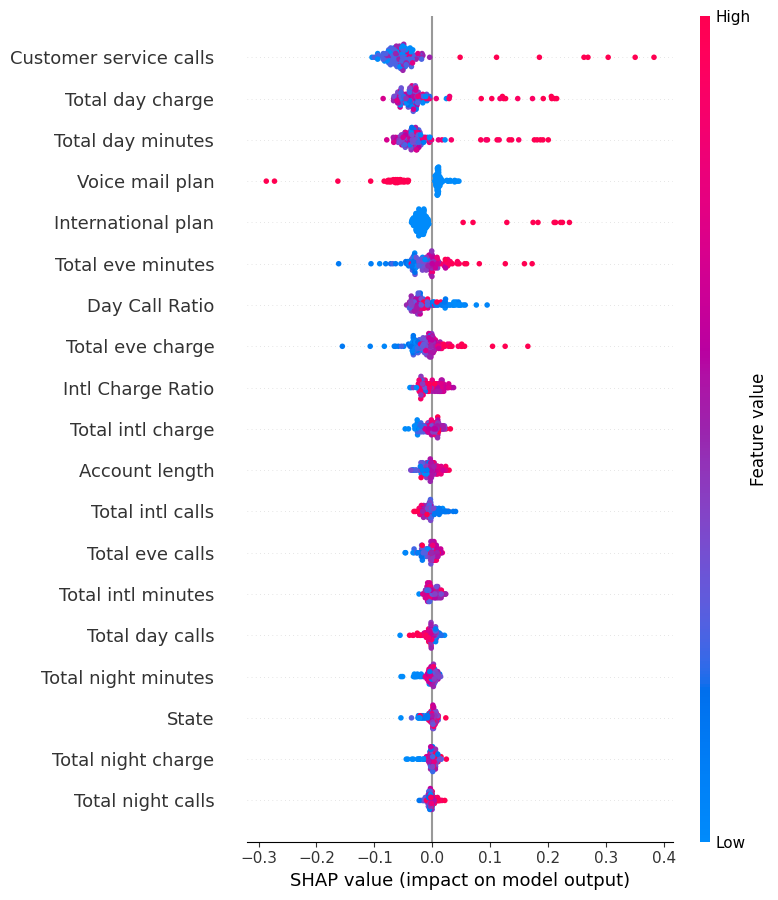

SHAP Summary Plot for LGBM


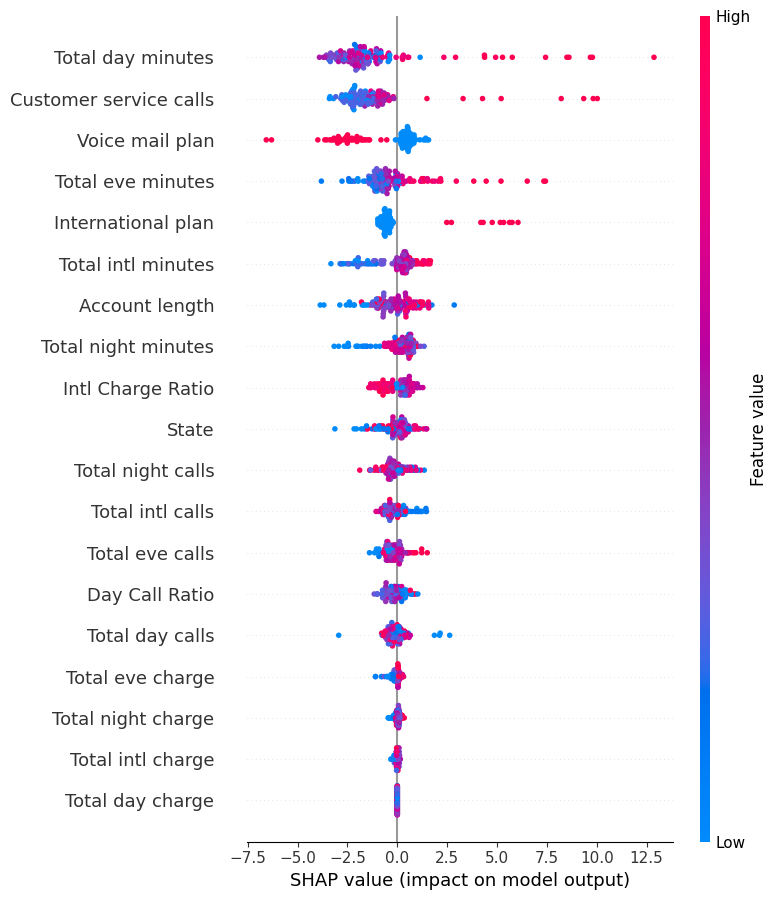

SHAP Summary Plot for XGBoost


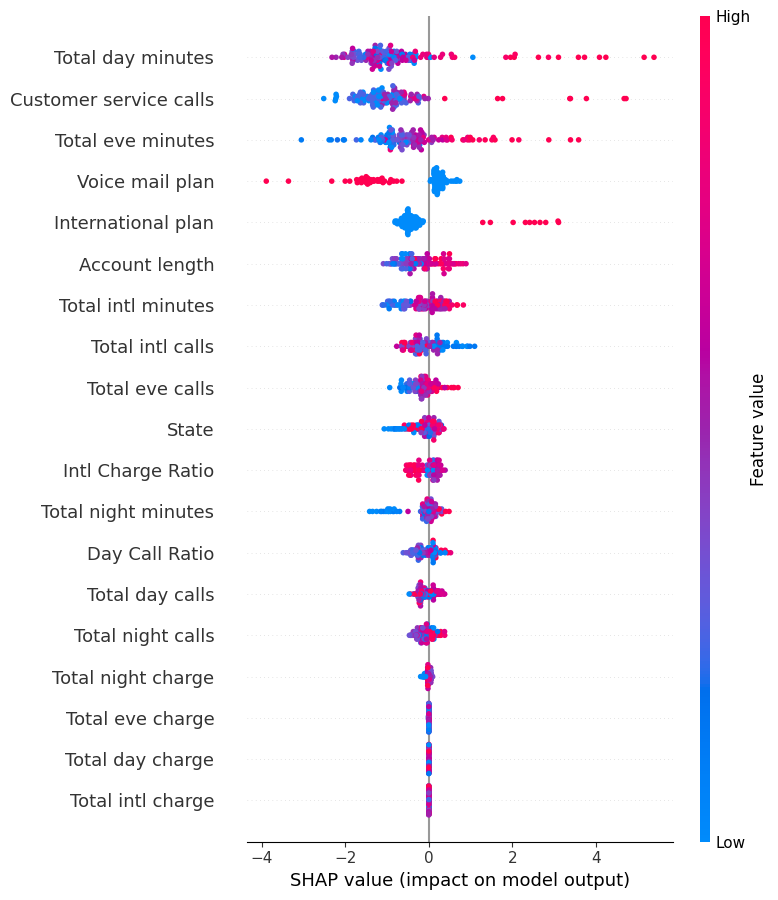

SHAP Summary Plot for CatBoost


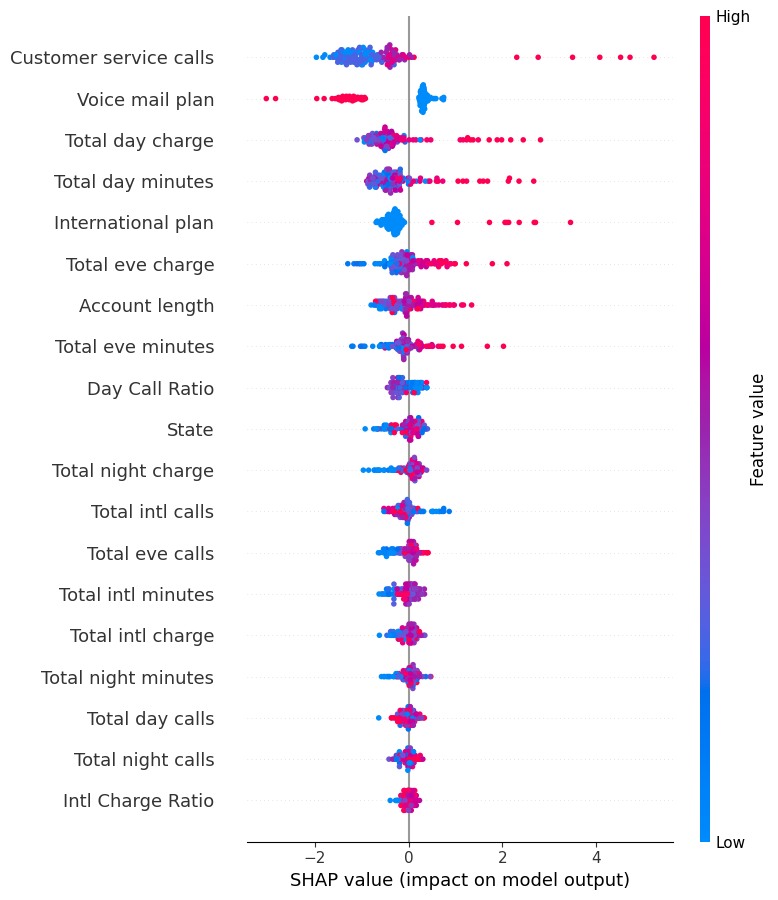

In [ ]:
for name, shap_vals in shap_values.items():
    print(f"SHAP Summary Plot for {name}")
    shap.summary_plot(shap_vals, X_test)  # Generate SHAP summary plot

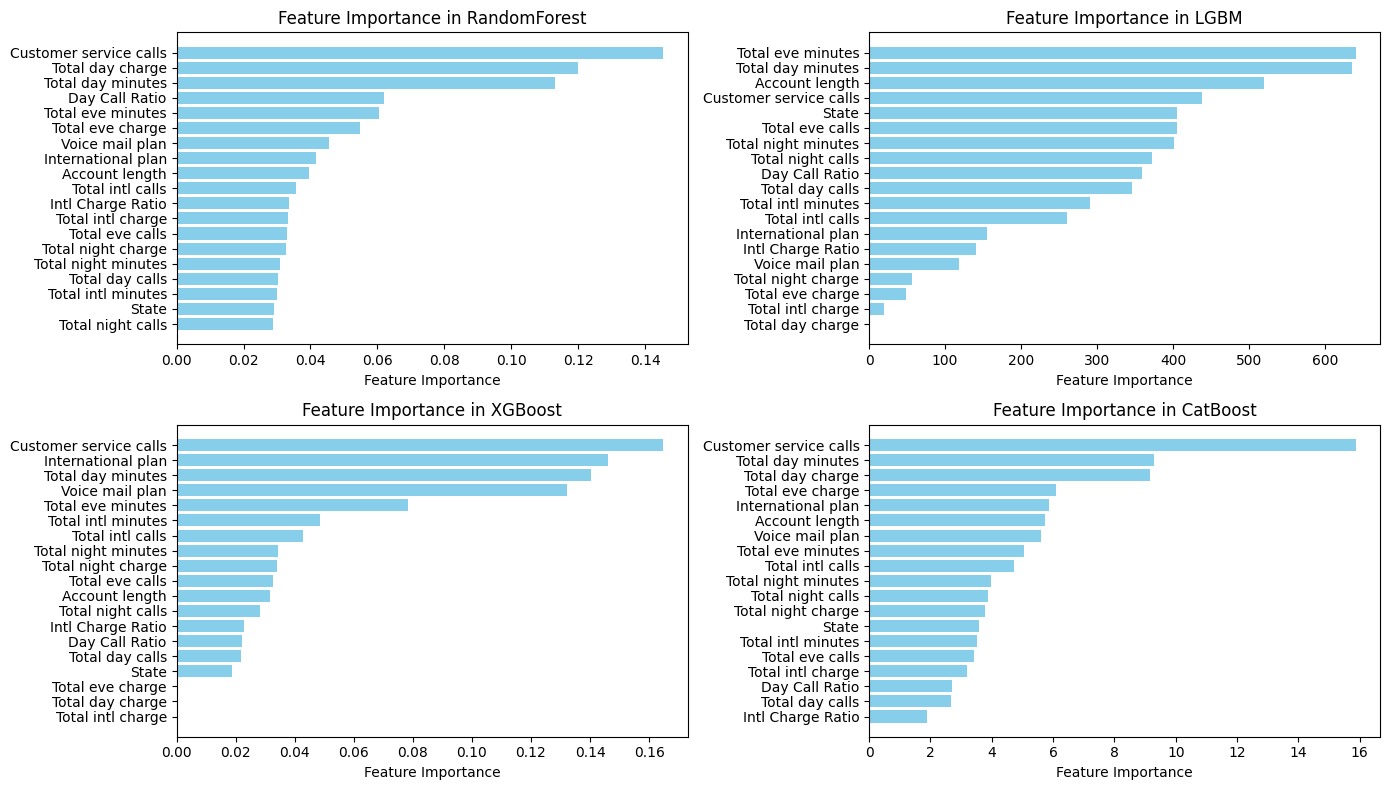

In [ ]:
# Plot Feature Importance for all models
plt.figure(figsize=(14, 8))

for i, (name, model) in enumerate(models.items()):
    feature_importances = model.feature_importances_
    sorted_idx = np.argsort(feature_importances)

    plt.subplot(2, 2, i + 1)
    plt.barh(np.array(X.columns)[sorted_idx], feature_importances[sorted_idx], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance in {name}")

plt.tight_layout()
plt.show()

<h2>5. Model Evaluation</h2>

In [ ]:
results = {}

<h3> 5.1 Classification, Accuracy, ROC-AUC, Precision-Recall Curve <h3>

In [ ]:
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)  # Make class predictions
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probability scores for positive class (Churn = 1)

    # Store results
    results[name] = {
        "model": model,
        "accuracy": accuracy_score(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_probs),
        "precision_recall": precision_recall_curve(y_test, y_probs)
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 228, number of negative: 457
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2956
[LightGBM] [Info] Number of data points in the train set: 685, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332847 -> initscore=-0.695338
[LightGBM] [Info] Start training from score -0.695338
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

<h3> 5.2 Accuracy <h3>

In [ ]:
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']:.4f}")


RandomForest Accuracy: 0.9328
LGBM Accuracy: 0.9328
XGBoost Accuracy: 0.9552
CatBoost Accuracy: 0.9179


<h3> 5.3 Confusion Matrix <h3>

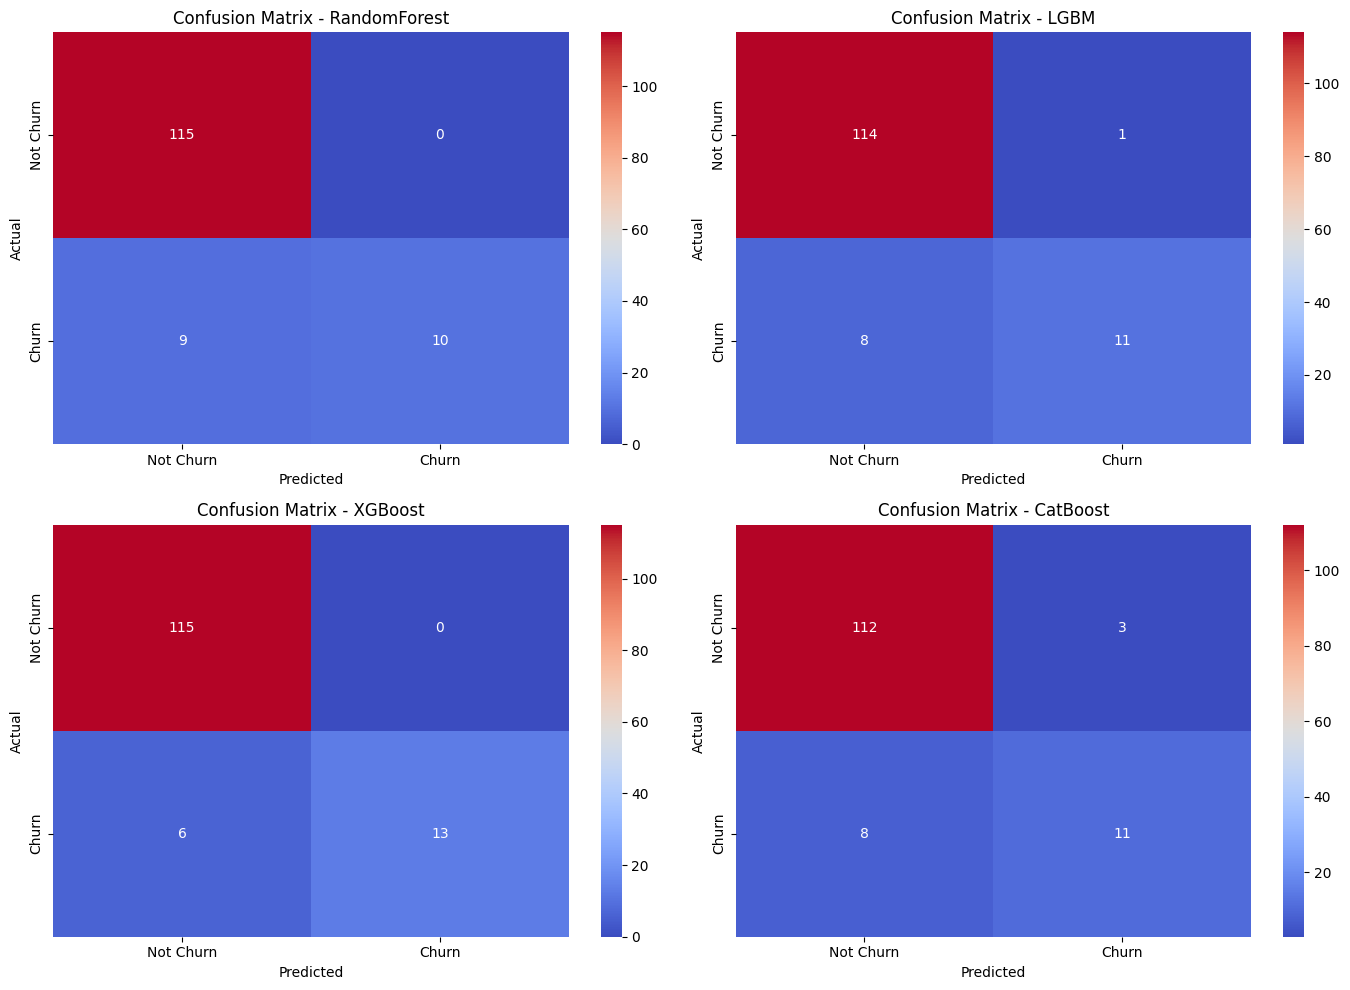

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, (name, result) in enumerate(results.items()):
    sns.heatmap(result["confusion_matrix"], annot=True, fmt="d", cmap="coolwarm",
                xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f"Confusion Matrix - {name}")
    axes[i//2, i%2].set_xlabel("Predicted")
    axes[i//2, i%2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

<h3> 5.4 Precision-Recall Curve <h3>

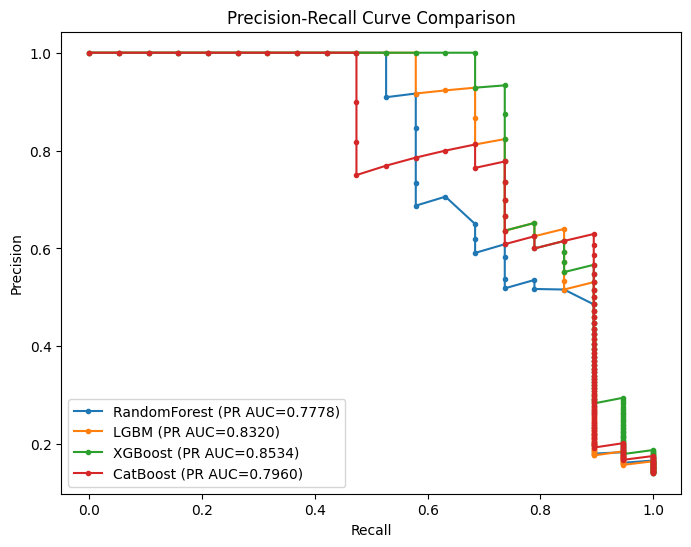

In [ ]:
# Compare Precision-Recall Curve for All Models
plt.figure(figsize=(8, 6))
for name, result in results.items():
    precision, recall, _ = result["precision_recall"]
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, marker='.', label=f"{name} (PR AUC={pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.show()

<h2> 6. Conclusion <h2>

- Trained multiple machine learning models to predict customer churn.
- LGBM & XGBoost performed the best in PR- AUC
- In accuracy XGBoost was the best followed by LGBM and RandomForest
- SHAP values provided interpretability.
- SMOTE helped in handling imbalance.
- GridSearchCV optimized hyperparameters for better performance.